In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
import sys

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

import matplotlib.pyplot as plt



In [ ]:
tf.__version__

'2.6.0'

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train))
print(X_train.shape)
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


In [ ]:
print(len(X_test))
print(X_test.shape)
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


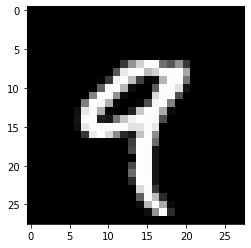

In [ ]:
digit = X_train[4]
plt.imshow(digit, cmap='gray')
plt.show()

In [ ]:
np.set_printoptions(linewidth=150)
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

In [ ]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
# Normalization
# (X - min) / max - min
# cf. MinMaxScaler of sklearn

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

### One Hot Encoding

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Model Define

In [ ]:
mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mnist.add(layers.Dense(256, activation='relu'))
mnist.add(layers.Dense(10, activation='softmax'))

In [ ]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### Model Compile

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Model Fit

In [ ]:
%time
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs
Epoch 1/100
375/375 [==============================] - 5s 6ms/step - loss: 0.2562 - accuracy: 0.9220 - val_loss: 0.1558 - val_accuracy: 0.9537
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0922 - accuracy: 0.9718 - val_loss: 0.0952 - val_accuracy: 0.9719
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0600 - accuracy: 0.9810 - val_loss: 0.0835 - val_accuracy: 0.9777
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0410 - accuracy: 0.9862 - val_loss: 0.1003 - val_accuracy: 0.9759
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0932 - val_accuracy: 0.9799
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0952 - val_accuracy: 0.9768
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss:

### Loss Visualization
> overfitting 경향이 보임

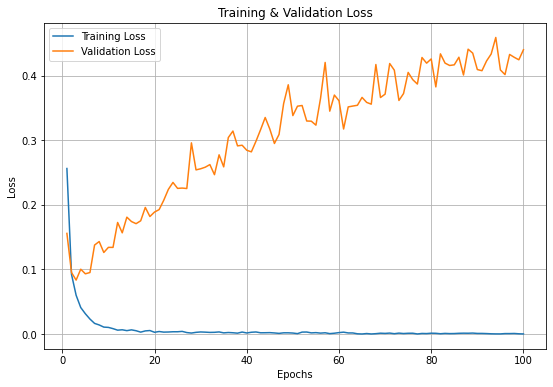

In [ ]:
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

### Model Evaluation

In [ ]:
# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.3887 - accuracy: 0.9814
Loss = 0.38865
Accuracy = 0.98140


### Model Predict

In [ ]:
np.set_printoptions(suppress = True, precision=9) # 과학적 표기법X, 0자리까지 표시
print(mnist.predict(X_test[:, :]))

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# X_test[0, :]

In [ ]:
#  X_test[0, :].ndim


In [ ]:
# X_test[:1, :]

In [ ]:
# X_test[:1, :].ndim

In [ ]:
np.set_printoptions(threshold=sys.maxsize) # ndarray 전부 표시
print(mnist.predict(X_test[:, :]))

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3237 - accuracy: 0.9091 - val_loss: 0.1738 - val_accuracy: 0.9520
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1444 - accuracy: 0.9572 - val_loss: 0.1227 - val_accuracy: 0.9647
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0980 - accuracy: 0.9714 - val_loss: 0.1086 - val_accuracy: 0.9703
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0745 - accuracy: 0.9783 - val_loss: 0.0931 - val_accuracy: 0.9717
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0578 - accuracy: 0.9826 - val_loss: 0.0870 - val_accuracy: 0.9753
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0460 - accuracy: 0.9867 - val_loss: 0.0828 - val_accuracy: 0.9748
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0374 - accuracy: 0.9895 - val_loss: 0.0868 - val_accuracy: 0.9753

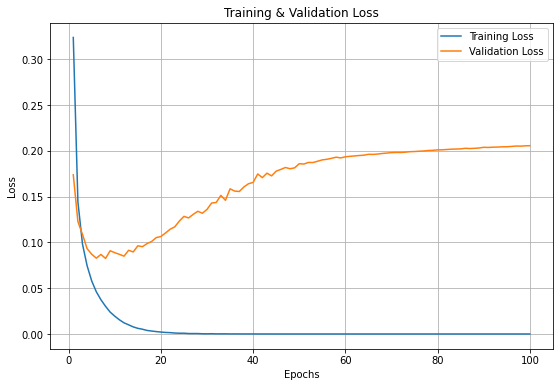

313/313 [==============================] - 1s 3ms/step - loss: 0.1848 - accuracy: 0.9811
Loss = 0.18478
Accuracy = 0.98110


In [ ]:
# - Hidden layer (- Nodes)
# Model Define
mnist = models.Sequential()
mnist.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
mnist.add(layers.Dense(10, activation='softmax'))

# Model Compile
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Fit
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

# Loss visualization
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수
plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.2650 - accuracy: 0.9222 - val_loss: 0.1351 - val_accuracy: 0.9613
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1036 - accuracy: 0.9710 - val_loss: 0.0966 - val_accuracy: 0.9732
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0709 - accuracy: 0.9808 - val_loss: 0.0926 - val_accuracy: 0.9764
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0533 - accuracy: 0.9864 - val_loss: 0.0993 - val_accuracy: 0.9752
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0439 - accuracy: 0.9896 - val_loss: 0.0999 - val_accuracy: 0.9768
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0369 - accuracy: 0.9917 - val_loss: 0.0943 - val_accuracy: 0.9797
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0332 - accuracy: 0.9929 - val_loss: 0.1145 - val_accuracy: 0.9761

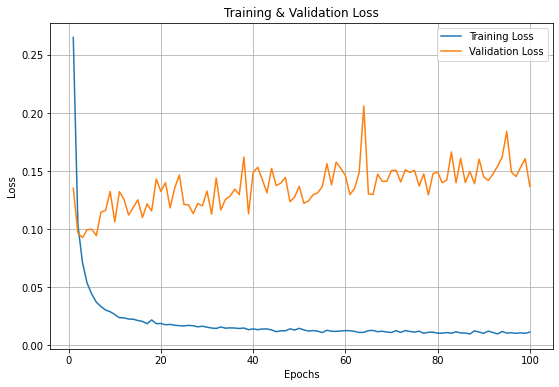

313/313 [==============================] - 1s 3ms/step - loss: 0.1357 - accuracy: 0.9800
Loss = 0.13575
Accuracy = 0.98000


In [ ]:

# L2 Regularization(노이즈 추가, 에러 증가)
# Model Define
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001),
                       input_shape=(28 * 28,)))
mnist.add(layers.Dense(256, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.Dense(10, activation='softmax'))

# Model Compile
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Fit
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

# Loss visualization
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수
plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.3237 - accuracy: 0.9006 - val_loss: 0.1337 - val_accuracy: 0.9591
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1455 - accuracy: 0.9556 - val_loss: 0.1125 - val_accuracy: 0.9652
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1095 - accuracy: 0.9670 - val_loss: 0.0936 - val_accuracy: 0.9733
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0894 - accuracy: 0.9733 - val_loss: 0.0873 - val_accuracy: 0.9758
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0796 - accuracy: 0.9772 - val_loss: 0.0886 - val_accuracy: 0.9774
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0704 - accuracy: 0.9782 - val_loss: 0.1033 - val_accuracy: 0.9755
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0642 - accuracy: 0.9809 - val_loss: 0.0911 - val_accuracy: 0.9799

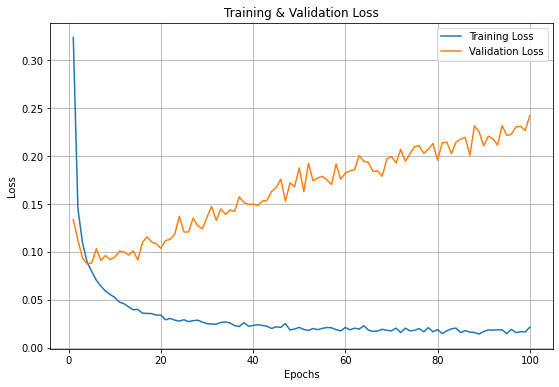

313/313 [==============================] - 1s 3ms/step - loss: 0.1948 - accuracy: 0.9840
Loss = 0.19476
Accuracy = 0.98400


In [ ]:

# Dropout
# Model Define
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256, activation='relu'))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation='softmax'))

# Model Compile
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Fit
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

# Loss visualization
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수
plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.4382 - accuracy: 0.8709 - val_loss: 0.1736 - val_accuracy: 0.9491
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2080 - accuracy: 0.9415 - val_loss: 0.1245 - val_accuracy: 0.9647
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1601 - accuracy: 0.9540 - val_loss: 0.1128 - val_accuracy: 0.9693
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1342 - accuracy: 0.9633 - val_loss: 0.1022 - val_accuracy: 0.9719
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1180 - accuracy: 0.9670 - val_loss: 0.0991 - val_accuracy: 0.9737
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1058 - accuracy: 0.9704 - val_loss: 0.1032 - val_accuracy: 0.9740
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1002 - accuracy: 0.9728 - val_loss: 0.0935 - val_accuracy: 0.9752

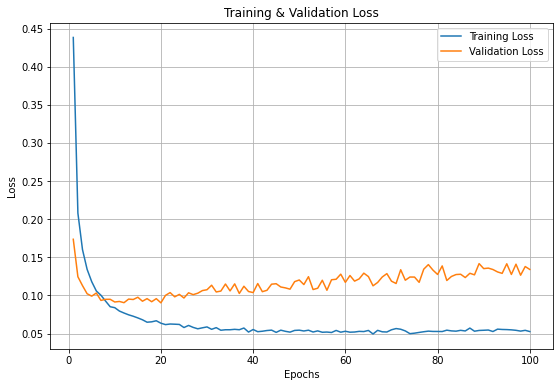

313/313 [==============================] - 1s 3ms/step - loss: 0.1301 - accuracy: 0.9812
Loss = 0.13010
Accuracy = 0.98120


In [ ]:

# a mix of (- capa, L2, dropout)
# Model Define
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(256, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001),
                       input_shape=(28 * 28,)))
mnist.add(layers.Dropout(0.3))
mnist.add(layers.Dense(64, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.Dropout(0.3))
mnist.add(layers.Dense(10, activation='softmax'))

# Model Compile
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Fit
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

# Loss visualization
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수
plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 4s 8ms/step - loss: 0.1844 - accuracy: 0.9444 - val_loss: 0.1207 - val_accuracy: 0.9647
Epoch 2/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0748 - accuracy: 0.9765 - val_loss: 0.0877 - val_accuracy: 0.9757
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0841 - val_accuracy: 0.9761
Epoch 4/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0880 - val_accuracy: 0.9769
Epoch 5/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0882 - val_accuracy: 0.9780
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0834 - val_accuracy: 0.9787
Epoch 7/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 0.0936 - val_accuracy: 0.9760

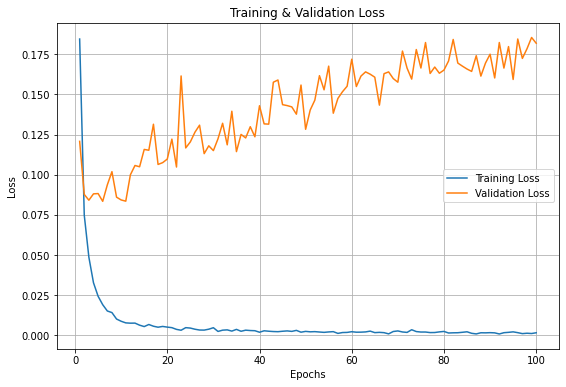

313/313 [==============================] - 1s 4ms/step - loss: 0.1611 - accuracy: 0.9812
Loss = 0.16112
Accuracy = 0.98120


In [ ]:

# batch normalization
# Model Define
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(256, activation='relu'))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(10, activation='softmax'))

# Model Compile
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Fit
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

# Loss visualization
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수
plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 4s 8ms/step - loss: 0.1941 - accuracy: 0.9445 - val_loss: 0.1250 - val_accuracy: 0.9653
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0806 - accuracy: 0.9771 - val_loss: 0.1044 - val_accuracy: 0.9736
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0568 - accuracy: 0.9846 - val_loss: 0.0959 - val_accuracy: 0.9743
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0444 - accuracy: 0.9896 - val_loss: 0.0992 - val_accuracy: 0.9755
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0352 - accuracy: 0.9921 - val_loss: 0.1015 - val_accuracy: 0.9753
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0317 - accuracy: 0.9930 - val_loss: 0.1023 - val_accuracy: 0.9765
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0281 - accuracy: 0.9943 - val_loss: 0.1019 - val_accuracy: 0.9764

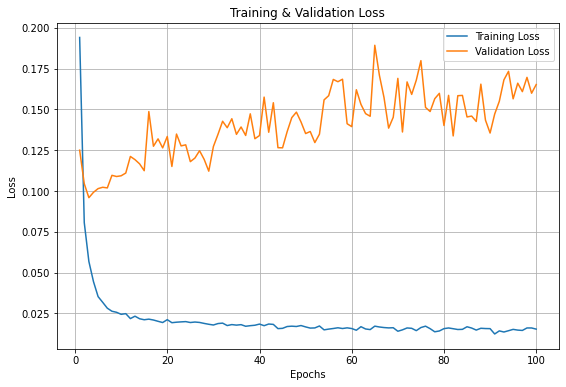

313/313 [==============================] - 1s 4ms/step - loss: 0.1586 - accuracy: 0.9784
Loss = 0.15862
Accuracy = 0.97840


In [ ]:

# L2 + batch normalization
# Model Define
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001),
                       input_shape=(28 * 28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(256, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(10, activation='softmax'))

# Model Compile
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Fit
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

# Loss visualization
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수
plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 4s 8ms/step - loss: 0.3939 - accuracy: 0.8820 - val_loss: 0.1417 - val_accuracy: 0.9587
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1883 - accuracy: 0.9443 - val_loss: 0.1084 - val_accuracy: 0.9664
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1513 - accuracy: 0.9554 - val_loss: 0.1012 - val_accuracy: 0.9715
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1283 - accuracy: 0.9623 - val_loss: 0.0939 - val_accuracy: 0.9737
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1191 - accuracy: 0.9650 - val_loss: 0.0870 - val_accuracy: 0.9761
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1106 - accuracy: 0.9671 - val_loss: 0.0829 - val_accuracy: 0.9770
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0984 - accuracy: 0.9713 - val_loss: 0.0830 - val_accuracy: 0.9785

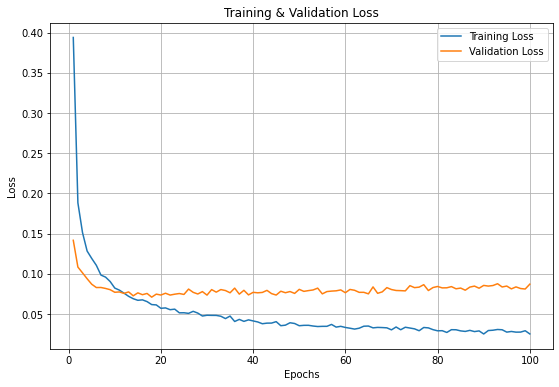

313/313 [==============================] - 1s 4ms/step - loss: 0.0758 - accuracy: 0.9845
Loss = 0.07578
Accuracy = 0.98450


In [ ]:

################# dropout + batch normalization #################
# 순서 : Activation에 넣기 직전에 batch를 standardization 해줌
# Model Define
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(256, activation='relu'))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(10, activation='softmax'))

# Model Compile
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Fit
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

# Loss visualization
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수
plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 3s 7ms/step - loss: 0.4107 - accuracy: 0.8758 - val_loss: 0.1582 - val_accuracy: 0.9561
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.2024 - accuracy: 0.9432 - val_loss: 0.1287 - val_accuracy: 0.9649
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1612 - accuracy: 0.9556 - val_loss: 0.1129 - val_accuracy: 0.9718
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1403 - accuracy: 0.9618 - val_loss: 0.1091 - val_accuracy: 0.9726
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1330 - accuracy: 0.9654 - val_loss: 0.1049 - val_accuracy: 0.9734
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1219 - accuracy: 0.9673 - val_loss: 0.1095 - val_accuracy: 0.9745
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1184 - accuracy: 0.9701 - val_loss: 0.1102 - val_accuracy: 0.9757

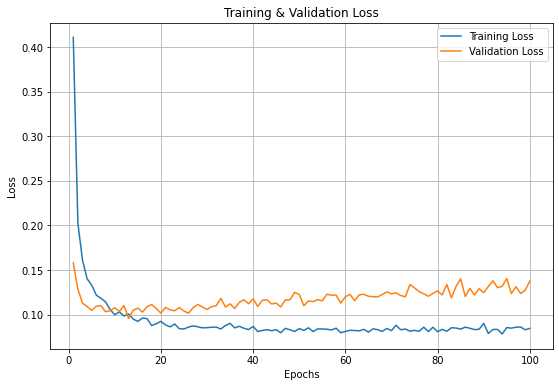

313/313 [==============================] - 1s 3ms/step - loss: 0.1338 - accuracy: 0.9820
Loss = 0.13379
Accuracy = 0.98200


In [ ]:

# dropout + L2
# Model Define
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001),
                       input_shape=(28 * 28,)))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.Dense(256, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.Dense(10, activation='softmax'))

# Model Compile
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Fit
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

# Loss visualization
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수
plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 4s 8ms/step - loss: 0.3988 - accuracy: 0.8810 - val_loss: 0.1534 - val_accuracy: 0.9579
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 0.2071 - accuracy: 0.9415 - val_loss: 0.1214 - val_accuracy: 0.9671
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1633 - accuracy: 0.9553 - val_loss: 0.1094 - val_accuracy: 0.9697
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1455 - accuracy: 0.9605 - val_loss: 0.1066 - val_accuracy: 0.9731
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1337 - accuracy: 0.9640 - val_loss: 0.1017 - val_accuracy: 0.9757
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1234 - accuracy: 0.9680 - val_loss: 0.0978 - val_accuracy: 0.9757
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1139 - accuracy: 0.9697 - val_loss: 0.0968 - val_accuracy: 0.9778

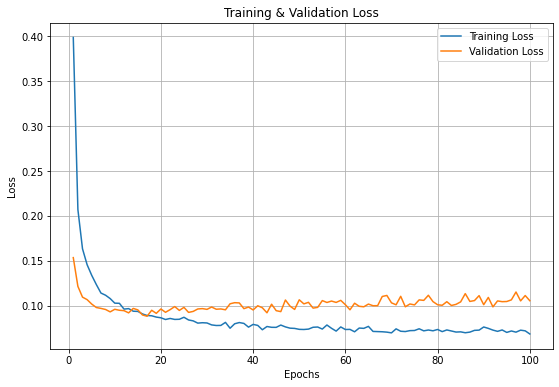

313/313 [==============================] - 1s 4ms/step - loss: 0.0936 - accuracy: 0.9839
Loss = 0.09358
Accuracy = 0.98390


In [ ]:

# L2 + dropout + Batch Normalization
# Model Define
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001),
                       input_shape=(28 * 28,)))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(256, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(10, activation='softmax'))

# Model Compile
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Fit
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

# Loss visualization
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수
plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 0.6429 - accuracy: 0.8125 - val_loss: 0.1978 - val_accuracy: 0.9468
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.3155 - accuracy: 0.9145 - val_loss: 0.1421 - val_accuracy: 0.9603
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.2616 - accuracy: 0.9296 - val_loss: 0.1288 - val_accuracy: 0.9635
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.2236 - accuracy: 0.9392 - val_loss: 0.1204 - val_accuracy: 0.9669
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.2149 - accuracy: 0.9446 - val_loss: 0.1114 - val_accuracy: 0.9692
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1982 - accuracy: 0.9486 - val_loss: 0.1097 - val_accuracy: 0.9704
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1871 - accuracy: 0.9507 - val_loss: 0.1031 - val_accuracy: 0.9717

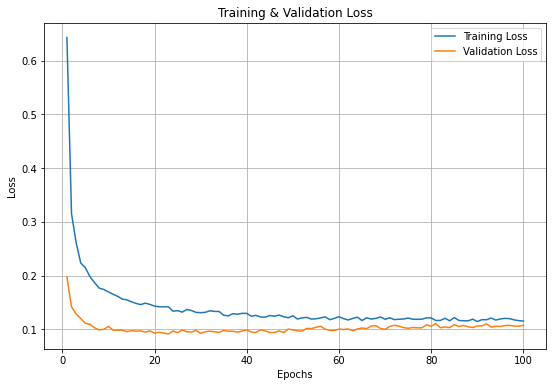

313/313 [==============================] - 1s 4ms/step - loss: 0.1015 - accuracy: 0.9796
Loss = 0.10150
Accuracy = 0.97960


In [ ]:

# - capacity + L2 + dropout + Batch Normalization
# Model Define
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(256, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001),
                       input_shape=(28 * 28,)))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(64, activation='relu',
                       kernel_regularizer=regularizers.l2(0.00001)))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(10, activation='softmax'))

# Model Compile
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Model Fit
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs=100,
                       batch_size=128,
                       validation_split=0.2)

# Loss visualization
epochs = range(1, len(Hist_mnist.history['loss']) + 1) # 횟수
plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss']) # legend : 범례
plt.grid()
plt.show()

# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

### dropout + batch normalization 조합이 가장 결과가 좋았음